In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import warnings

warnings.filterwarnings("ignore")

In [2]:
def usedFunction(timeIN):
  resultOUT = np.cos(3200*2*np.pi*timeIN) + (0.5*np.cos(600*2*np.pi*timeIN)) + (0.01*np.cos(300*2*np.pi*timeIN))
  return resultOUT
def sincFunction(valueIN):
  if (valueIN == 0):
    valueOUT = 1
  else:
    valueOUT = np.sin(np.pi*valueIN)/(np.pi*valueIN)
  return valueOUT

## Questão 1

#### A frequência de amostragem deve ser, no mínimo, o dobro da maior frequência do sinal original: Fs > 2*3200
##### Fs = 8192

In [3]:
# FS > 2*maxF => FS > 6400 
FS = 8192
time = np.linspace(0, 1, FS+1)
sampledFunct = usedFunction(time)
resultSample = np.zeros(FS+1)

for i in range(FS+1):
  resultSample = resultSample + (sampledFunct[i]*np.sinc(FS*time - i))
# for i in range(FS+1):
#   resultSample = resultSample + (sampledFunct[i]*sincFunction(np.pi*(FS*time - i)))

In [4]:
def usedSpectre(valueIN):
  if (valueIN == 3200) | (valueIN == -3200):
    return 0.5
  if (valueIN == 600) | (valueIN == -600):
    return 0.5*0.5
  if (valueIN == 300) | (valueIN == -300):
    return 0.01*0.5
  return 0

In [5]:
frequency = np.linspace(-4096, 4096, 1000*FS+1)

functSpectre = np.zeros(1000*FS+1)
for i in range(1000*FS+1):
  functSpectre[i] = usedSpectre(frequency[i])
# plt.xlim(0, 0.03)
# plt.ylim(-0.5, 1)

sampleSpectre = abs(np.fft.fft(resultSample))
freq = np.fft.fftfreq(len(resultSample), 1/FS)


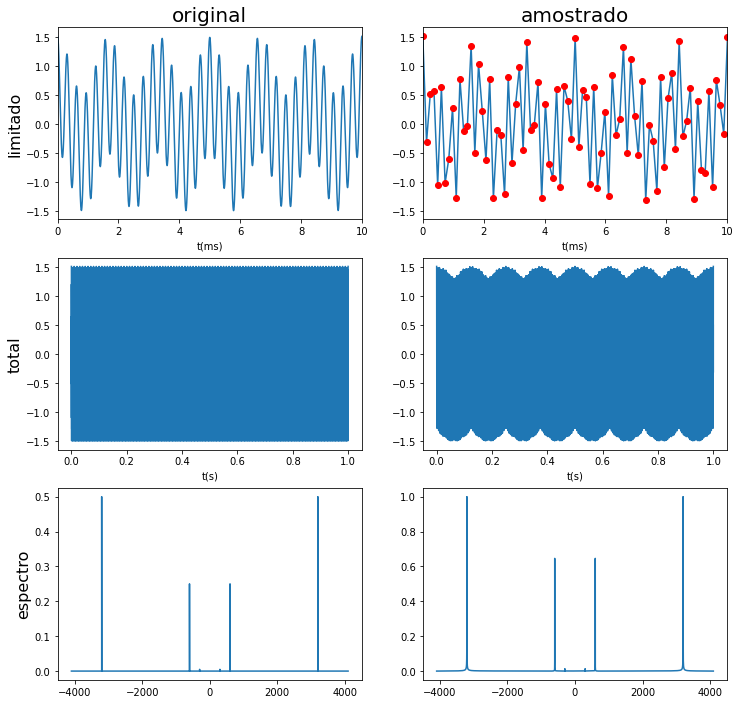

In [6]:
timeAUX = np.linspace(0, 1, 1000*FS+1)
figure1, ax1 = plt.subplots(3,2, figsize = [12,12])

ax1[0][0].set_title("original", fontsize = 20)
ax1[0][0].set_xlabel("t(ms)", fontsize = 10)
ax1[1][0].set_xlabel("t(s)", fontsize = 10)
ax1[0][1].set_title("amostrado", fontsize = 20)
ax1[0][1].set_xlabel("t(ms)", fontsize = 10)
ax1[1][1].set_xlabel("t(s)", fontsize = 10)

ax1[0][0].set_ylabel("limitado", fontsize = 16)
ax1[0][0].plot(1e3*timeAUX, usedFunction(timeAUX))
ax1[0][0].set_xlim(0, 1e3*0.01)
ax1[0][1].plot(1e3*time, resultSample)
ax1[0][1].plot(1e3*time, resultSample, 'o', c = 'r')
# ax1[0][1].stem(time, resultSample, 'r')
ax1[0][1].set_xlim(0, 1e3*0.01)

ax1[1][0].set_ylabel("total", fontsize = 16)
ax1[1][0].plot(timeAUX, usedFunction(timeAUX))
ax1[1][1].plot(time, resultSample)

ax1[2][0].set_ylabel("espectro", fontsize = 16)
ax1[2][0].plot(frequency, functSpectre)
ax1[2][1].plot(np.fft.fftshift(freq), np.fft.fftshift(sampleSpectre)/sampleSpectre.max())

## Questão 2

#### Fs2 = 4096; Fs4 = 2048

In [7]:
FS2 = 4096
FS4 = 2048

time2 = np.linspace(0, 1, FS2+1)
time21 = np.linspace(0, 1, FS+1)
resultSample2 = usedFunction(time2)
resultSample21 = np.zeros(FS+1)

for i in range(FS2+1):
  resultSample21 = resultSample21 + (resultSample2[i]*np.sinc(FS2*time21 - i))

    
time4 = np.linspace(0, 1, FS4+1)
time41 = np.linspace(0, 1, FS+1)
resultSample4 = usedFunction(time4)
resultSample41 = np.zeros(FS+1)

for i in range(FS4+1):
  resultSample41 = resultSample41 + (resultSample4[i]*np.sinc(FS4*time41 - i))


sampleSpectre2 = abs(np.fft.fft(resultSample2))
freq2 = np.fft.fftfreq(len(resultSample2), 1/FS2)
sampleSpectre4 = abs(np.fft.fft(resultSample4))
freq4 = np.fft.fftfreq(len(resultSample4), 1/FS4)


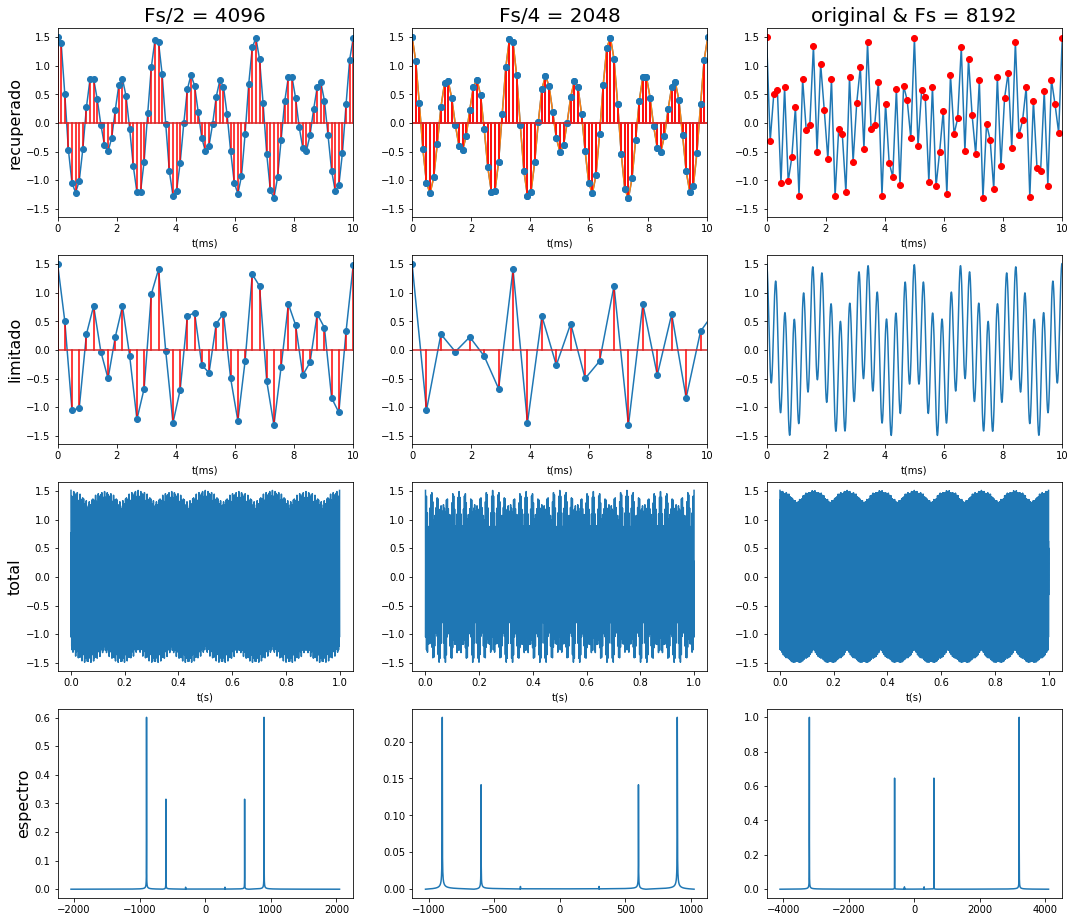

In [8]:
figure1, ax1 = plt.subplots(4,3, figsize = [18,16])

ax1[0][0].set_title("Fs/2 = 4096", fontsize = 20)
ax1[0][0].set_xlabel("t(ms)", fontsize = 10)
ax1[1][0].set_xlabel("t(ms)", fontsize = 10)
ax1[2][0].set_xlabel("t(s)", fontsize = 10)
ax1[0][1].set_title("Fs/4 = 2048", fontsize = 20)
ax1[0][1].set_xlabel("t(ms)", fontsize = 10)
ax1[1][1].set_xlabel("t(ms)", fontsize = 10)
ax1[2][1].set_xlabel("t(s)", fontsize = 10)
ax1[0][2].set_title("original & Fs = 8192", fontsize = 20)
ax1[0][2].set_xlabel("t(ms)", fontsize = 10)
ax1[1][2].set_xlabel("t(ms)", fontsize = 10)
ax1[2][2].set_xlabel("t(s)", fontsize = 10)

ax1[0][0].set_ylabel("recuperado", fontsize = 16)
ax1[0][0].plot(1e3*time21, resultSample21)
ax1[0][0].stem(1e3*time21, resultSample21, 'r')
ax1[0][0].set_xlim(0,1e3* 0.01)
ax1[0][1].plot(1e3*time41, resultSample41)
ax1[0][1].stem(1e3*time41, resultSample41, 'r')
ax1[0][1].set_xlim(0, 1e3*0.01)
ax1[0][1].plot(1e3*time41, resultSample41)
ax1[0][1].stem(1e3*time41, resultSample41, 'r')
ax1[0][1].set_xlim(0, 1e3*0.01)
ax1[0][2].plot(1e3*time, resultSample)
ax1[0][2].plot(1e3*time, resultSample, 'o', c = 'r')
ax1[0][2].set_xlim(0, 1e3*0.01)

ax1[1][0].set_ylabel("limitado", fontsize = 16)
ax1[1][0].plot(1e3*time2, resultSample2)
ax1[1][0].stem(1e3*time2, resultSample2, 'r')
ax1[1][0].set_xlim(0,1e3* 0.01)
ax1[1][1].plot(1e3*time4, resultSample4)
ax1[1][1].stem(1e3*time4, resultSample4, 'r')
ax1[1][1].set_xlim(0, 1e3*0.01)
ax1[1][2].plot(1e3*timeAUX, usedFunction(timeAUX))
ax1[1][2].set_xlim(0, 1e3*0.01)

ax1[2][0].set_ylabel("total", fontsize = 16)
ax1[2][0].plot(time2, resultSample2)
ax1[2][1].plot(time4, resultSample4)
ax1[2][2].plot(time, resultSample)

ax1[3][0].set_ylabel("espectro", fontsize = 16)
ax1[3][0].plot(np.fft.fftshift(freq2), np.fft.fftshift(sampleSpectre2)/sampleSpectre.max())
ax1[3][1].plot(np.fft.fftshift(freq4), np.fft.fftshift(sampleSpectre4)/sampleSpectre.max())
ax1[3][2].plot(np.fft.fftshift(freq), np.fft.fftshift(sampleSpectre)/sampleSpectre.max())



## Questão 3

In [ ]:
FS6k = 6000

time6k = np.linspace(0, 1, FS6k+1)
sampledFunct6k = usedFunction(time6k)
resultSample6k = np.zeros(FS6k+1)

for i in range(FS6k+1):
  resultSample6k = resultSample6k + (sampledFunct6k[i]*np.sinc(np.pi*(FS6k*time6k - i)))

sampleSpectre6k = abs(np.fft.fft(resultSample6k))
freq6k= np.fft.fftfreq(len(resultSample6k), 1/FS6k)

In [ ]:
L = 2
timeL2 = np.zeros(int(FS6k/L) + 1)
resultSampleL2 = np.zeros(int(FS6k/L) + 1)    #Cria dois arrays com L vezes menos pontos
for i in range(int(FS6k/L) + 1):
  timeL2[i] = time6k[L*i]                     #Para montar os arrays, amostra-se 1 valor e ignora-se L a cada ciclo.
  resultSampleL2[i] = resultSample6k[L*i]

sampleSpectreL2 = abs(np.fft.fft(resultSampleL2))
freqL2 = np.fft.fftfreq(len(resultSampleL2), L/FS6k)


L = 5
timeL5 = np.zeros(int(FS6k/L) + 1)
resultSampleL5 = np.zeros(int(FS6k/L) + 1)
for i in range(int(FS6k/L) + 1):
  timeL5[i] = time6k[L*i]
  resultSampleL5[i] = resultSample6k[L*i]

sampleSpectreL5 = abs(np.fft.fft(resultSampleL5))
freqL5 = np.fft.fftfreq(len(resultSampleL5), L/FS6k)


L = 10
timeL10 = np.zeros(int(FS6k/L) + 1)
resultSampleL10 = np.zeros(int(FS6k/L) + 1)
for i in range(int(FS6k/L) + 1):
  timeL10[i] = time6k[L*i]
  resultSampleL10[i] = resultSample6k[L*i]

sampleSpectreL10 = abs(np.fft.fft(resultSampleL10))
freqL10 = np.fft.fftfreq(len(resultSampleL10), L/FS6k)


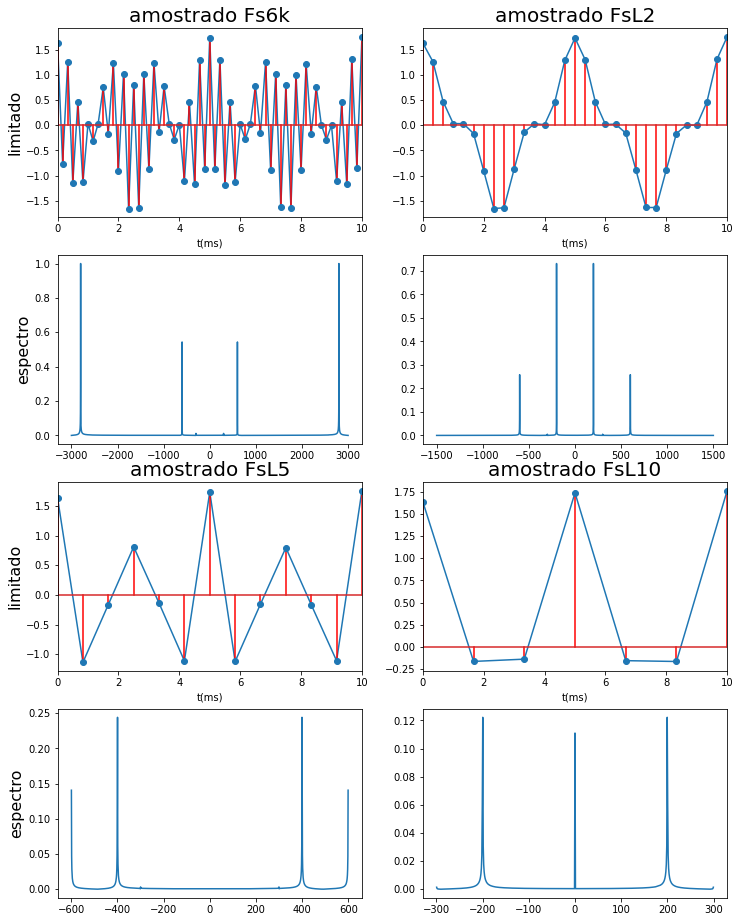

In [ ]:
figure1, ax1 = plt.subplots(4,2, figsize = [12,16])

ax1[0][0].set_title("amostrado Fs6k", fontsize = 20)
ax1[0][0].set_xlabel("t(ms)", fontsize = 10)
ax1[0][1].set_title("amostrado FsL2", fontsize = 20)
ax1[0][1].set_xlabel("t(ms)", fontsize = 10)
ax1[2][0].set_title("amostrado FsL5", fontsize = 20)
ax1[2][0].set_xlabel("t(ms)", fontsize = 10)
ax1[2][1].set_title("amostrado FsL10", fontsize = 20)
ax1[2][1].set_xlabel("t(ms)", fontsize = 10)

ax1[0][0].set_ylabel("limitado", fontsize = 16)
ax1[2][0].set_ylabel("limitado", fontsize = 16)
ax1[0][0].plot(1e3*time6k, resultSample6k)
ax1[0][0].stem(1e3*time6k, resultSample6k, 'r')
ax1[0][0].set_xlim(0, 10)
ax1[0][1].plot(1e3*timeL2, resultSampleL2)
ax1[0][1].stem(1e3*timeL2, resultSampleL2, 'r')
ax1[0][1].set_xlim(0, 10)
ax1[2][0].plot(1e3*timeL5, resultSampleL5)
ax1[2][0].stem(1e3*timeL5, resultSampleL5, 'r')
ax1[2][0].set_xlim(0, 10)
ax1[2][1].plot(1e3*timeL10, resultSampleL10)
ax1[2][1].stem(1e3*timeL10, resultSampleL10, 'r')
ax1[2][1].set_xlim(0, 10)

ax1[1][0].set_ylabel("espectro", fontsize = 16)
ax1[3][0].set_ylabel("espectro", fontsize = 16)
ax1[1][0].plot(np.fft.fftshift(freq6k), np.fft.fftshift(sampleSpectre6k)/sampleSpectre6k.max())
ax1[1][1].plot(np.fft.fftshift(freqL2), np.fft.fftshift(sampleSpectreL2)/sampleSpectre6k.max())
ax1[3][0].plot(np.fft.fftshift(freqL5), np.fft.fftshift(sampleSpectreL5)/sampleSpectre6k.max())
ax1[3][1].plot(np.fft.fftshift(freqL10), np.fft.fftshift(sampleSpectreL10)/sampleSpectre6k.max())

## Questão 4

In [ ]:
M = 2
timeM2 = np.zeros(int(FS6k*M) + 1)
resultSampleM2 = np.zeros(int(FS6k*M) + 1)    #Cria dois arrays com M vezes mais pontos

for i in range(FS6k):
  for j in range(M):
    timeM2[i*M + j] = time6k[i] + j*(time6k[i+1] - time6k[i])/M
timeM2[FS6k*M] = time6k[FS6k]           #O array de tempo é uma extensão linear do array de tempo anterior
for i in range(FS6k+1):                 #O array de valores é reamostrado baseado na reconstrução do sinal usando sincs
  resultSampleM2 = resultSampleM2 + (resultSample6k[i]*np.sinc(FS6k*timeM2 - i))

sampleSpectreM2 = abs(np.fft.fft(resultSampleM2))
freqM2 = np.fft.fftfreq(len(resultSampleM2), 1/(M*FS6k))


M = 5
timeM5 = np.zeros(int(FS6k*M) + 1)
resultSampleM5 = np.zeros(int(FS6k*M) + 1)

for i in range(FS6k):
  for j in range(M):
    timeM5[i*M + j] = time6k[i] + j*(time6k[i+1] - time6k[i])/M
timeM5[FS6k*M] = time6k[FS6k]
for i in range(FS6k+1):
  resultSampleM5 = resultSampleM5 + (resultSample6k[i]*np.sinc((FS6k*timeM5 - i)))

sampleSpectreM5 = abs(np.fft.fft(resultSampleM5))
freqM5 = np.fft.fftfreq(len(resultSampleM5), 1/(M*FS6k))


M = 10
timeM10 = np.zeros(int(FS6k*M) + 1)
resultSampleM10 = np.zeros(int(FS6k*M) + 1)

for i in range(FS6k):
  for j in range(M):
    timeM10[i*M + j] = time6k[i] + j*(time6k[i+1] - time6k[i])/M
timeM10[FS6k*M] = time6k[FS6k]
for i in range(FS6k+1):
  resultSampleM10 = resultSampleM10 + (resultSample6k[i]*np.sinc((FS6k*timeM10 - i)))

sampleSpectreM10 = abs(np.fft.fft(resultSampleM10))
freqM10 = np.fft.fftfreq(len(resultSampleM10), 1/(M*FS6k))


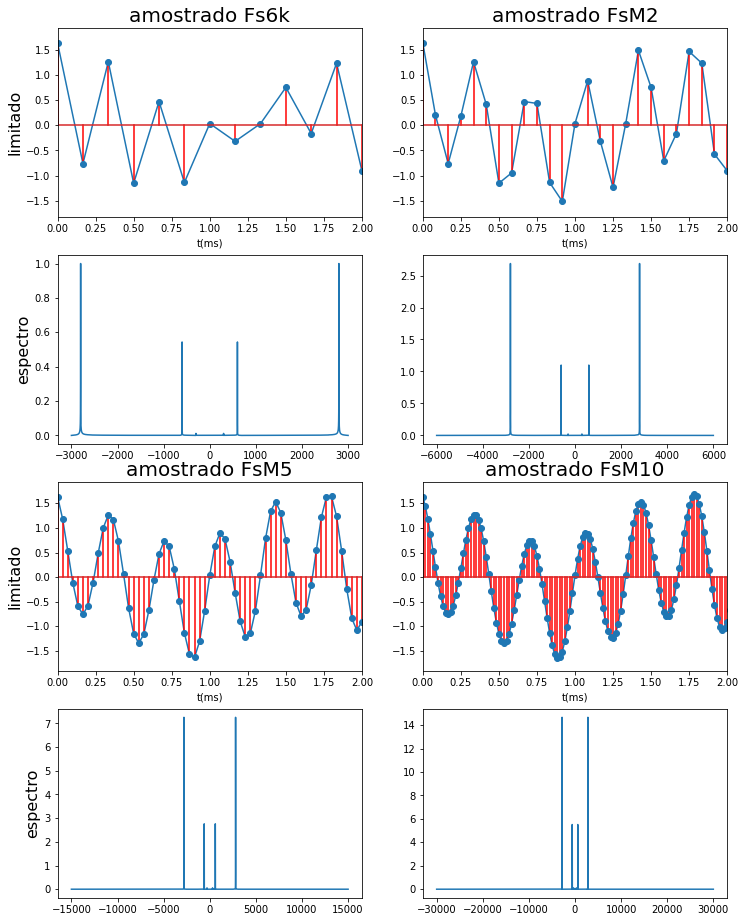

In [ ]:
figure1, ax1 = plt.subplots(4,2, figsize = [12,16])

ax1[0][0].set_title("amostrado Fs6k", fontsize = 20)
ax1[0][0].set_xlabel("t(ms)", fontsize = 10)
ax1[0][1].set_title("amostrado FsM2", fontsize = 20)
ax1[0][1].set_xlabel("t(ms)", fontsize = 10)
ax1[2][0].set_title("amostrado FsM5", fontsize = 20)
ax1[2][0].set_xlabel("t(ms)", fontsize = 10)
ax1[2][1].set_title("amostrado FsM10", fontsize = 20)
ax1[2][1].set_xlabel("t(ms)", fontsize = 10)

ax1[0][0].set_ylabel("limitado", fontsize = 16)
ax1[2][0].set_ylabel("limitado", fontsize = 16)
ax1[0][0].plot(1e3*time6k, resultSample6k)
ax1[0][0].stem(1e3*time6k, resultSample6k, 'r')
ax1[0][0].set_xlim(0, 2)
ax1[0][1].plot(1e3*timeM2, resultSampleM2)
ax1[0][1].stem(1e3*timeM2, resultSampleM2, 'r')
ax1[0][1].set_xlim(0, 2)
ax1[2][0].plot(1e3*timeM5, resultSampleM5)
ax1[2][0].stem(1e3*timeM5, resultSampleM5, 'r')
ax1[2][0].set_xlim(0, 2)
ax1[2][1].plot(1e3*timeM10, resultSampleM10)
ax1[2][1].stem(1e3*timeM10, resultSampleM10, 'r')
ax1[2][1].set_xlim(0, 2)

ax1[1][0].set_ylabel("espectro", fontsize = 16)
ax1[3][0].set_ylabel("espectro", fontsize = 16)
ax1[1][0].plot(np.fft.fftshift(freq6k), np.fft.fftshift(sampleSpectre6k)/sampleSpectre6k.max())
ax1[1][1].plot(np.fft.fftshift(freqM2), np.fft.fftshift(sampleSpectreM2)/sampleSpectre6k.max())
ax1[3][0].plot(np.fft.fftshift(freqM5), np.fft.fftshift(sampleSpectreM5)/sampleSpectre6k.max())
ax1[3][1].plot(np.fft.fftshift(freqM10), np.fft.fftshift(sampleSpectreM10)/sampleSpectre6k.max())